Discard: Random test codes

# Bayesian Hierachical models

## Task

- Regression of background and signal parameters and comparison with ground truth
  - Ground truth from Multinest
- Estimate of Bayesian evidence for a signal peak and comparison with ground truth
  - Ground truth from Multinest
  - TODO: implementation of model discrimination with swyft - requires essentially discrete variables
- Ability to do injection tests
  - Frequentist upper limits
  - Proper Bayesian posteriors
- Resilience against extra complications - randomly swapping cables

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt
from scipy.linalg import inv
from scipy import stats

In [3]:
import dynesty
import swyft

## Preparation

In [4]:
class ZoomTask:
    def __init__(self, sim_or_store, prior, target_obs, partition = None, simhook = None, init_bound = None):
        if not isinstance(sim_or_store, swyft.Simulator):
            self.store = sim_or_store
        else:
            self.store = swyft.MemoryStore(sim)
        
        if partition is None:
            self.partition = list(range(len(self.store.pnames)))
        else:
            self.partition = partition
            
        self.prior = prior
        self.simhook = simhook
        self.target_obs = target_obs
        
        self.init_bound = init_bound
        self.last_bound = None
        self.history = []
        
    def run(self, rounds = 10, N = 10000, train_args = {}):
        for i in range(rounds):
            self.round(N = N, train_args = train_args)
        
    def round(self, N, train_args = {}):
        bound = self.init_bound if self.history == [] else self.history[-1][1]
        
        self.store.add(N, self.prior, bound = bound)
        self.store.simulate()
        dataset = swyft.Dataset(N, self.prior, self.store, simhook = self.simhook, bound = bound)
        post = swyft.Posteriors(dataset)
        post.add(self.partition, device='cuda')
        post.train(self.partition, **train_args)
        bound = post.truncate(self.partition, self.target_obs)
        
        self.history.append([post, bound])

## Model definitions

In [5]:
N = 64
COUNTER = 0  # Likelihood evaluation counter

# Noise-free model

# Model and reference parameters
def spec(a, b, c):
    
    
def model(v):
    y = spec(v[0], v[1], v[2], v[3])
    return dict(y=y)

IndentationError: expected an indented block (<ipython-input-5-e806d935187a>, line 10)

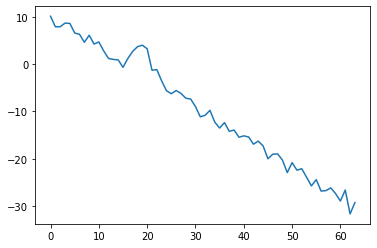

In [6]:
# Noise model

def noise(sim, v, sigma = 1.0):
    noise = np.random.randn(N)*sigma
    return dict(y = sim['y'] + noise)

v0 = np.array([10, -4, 5, 3])

obs0 = noise(model(v0), v0)
plt.plot(obs0['y'])

## Prior

In [7]:
# Prior is defined in terms of a transform function

def transform(u):
    return u*np.array([20, 10, 100, 10]) + np.array([0, -5, 0, 0])

## Dynesty analysis

In [8]:
def loglike(v):    
    mu = model(v)['y']
    return -0.5*sum((obs0['y'] - mu)**2)

In [9]:
ns = dynesty.NestedSampler(loglike, transform, 4)
ns.run_nested()
print(COUNTER)

257it [00:00, 2564.87it/s, bound: 0 | nc: 1 | ncall: 835 | eff(%): 30.778 | loglstar:   -inf < -45194.316 <    inf | logz: -45201.737 +/-  0.172 | dlogz: 45133.434 >  0.509]

2 0.002


1866it [00:03, 418.94it/s, bound: 1 | nc: 3 | ncall: 17659 | eff(%): 10.567 | loglstar:   -inf < -1175.513 <    inf | logz: -1185.696 +/-  0.191 | dlogz: 1135.595 >  0.509]  

3 6.396549975968584e-05


2168it [00:03, 728.08it/s, bound: 2 | nc: 1 | ncall: 18546 | eff(%): 11.690 | loglstar:   -inf < -733.266 <    inf | logz: -744.351 +/-  0.205 | dlogz: 694.780 >  0.509]   

3 3.540790440902289e-05


2375it [00:03, 808.62it/s, bound: 3 | nc: 11 | ncall: 19230 | eff(%): 12.350 | loglstar:   -inf < -566.362 <    inf | logz: -577.388 +/-  0.205 | dlogz: 526.489 >  0.509]

3 2.2814002628429997e-05


2561it [00:04, 790.39it/s, bound: 4 | nc: 1 | ncall: 19858 | eff(%): 12.897 | loglstar:   -inf < -458.929 <    inf | logz: -469.227 +/-  0.197 | dlogz: 416.964 >  0.509] 

3 1.4180245925826952e-05


2859it [00:04, 870.53it/s, bound: 5 | nc: 1 | ncall: 20863 | eff(%): 13.704 | loglstar:   -inf < -329.786 <    inf | logz: -340.307 +/-  0.198 | dlogz: 296.313 >  0.509] 

3 9.173191691197543e-06


3033it [00:04, 786.41it/s, bound: 6 | nc: 10 | ncall: 21589 | eff(%): 14.049 | loglstar:   -inf < -279.311 <    inf | logz: -290.090 +/-  0.199 | dlogz: 245.718 >  0.509]

3 5.9104661189930095e-06


3115it [00:04, 653.23it/s, bound: 7 | nc: 1 | ncall: 21969 | eff(%): 14.179 | loglstar:   -inf < -255.970 <    inf | logz: -266.636 +/-  0.198 | dlogz: 222.034 >  0.509] 

3 4.242090778514412e-06


3367it [00:05, 532.08it/s, bound: 8 | nc: 1 | ncall: 22938 | eff(%): 14.679 | loglstar:   -inf < -202.683 <    inf | logz: -213.882 +/-  0.204 | dlogz: 171.629 >  0.509]

3 2.8790020949268896e-06


3543it [00:05, 508.95it/s, bound: 9 | nc: 3 | ncall: 23595 | eff(%): 15.016 | loglstar:   -inf < -175.391 <    inf | logz: -186.432 +/-  0.201 | dlogz: 143.751 >  0.509]

3 1.957815332661766e-06


3761it [00:06, 489.63it/s, bound: 10 | nc: 6 | ncall: 24391 | eff(%): 15.420 | loglstar:   -inf < -148.745 <    inf | logz: -160.475 +/-  0.204 | dlogz: 117.393 >  0.509]

3 1.2817837479262534e-06


3930it [00:06, 460.36it/s, bound: 11 | nc: 4 | ncall: 25101 | eff(%): 15.657 | loglstar:   -inf < -133.252 <    inf | logz: -144.726 +/-  0.205 | dlogz: 101.240 >  0.509]

3 8.981736878658023e-07


4081it [00:06, 426.75it/s, bound: 12 | nc: 1 | ncall: 25790 | eff(%): 15.824 | loglstar:   -inf < -121.106 <    inf | logz: -132.765 +/-  0.206 | dlogz: 88.966 >  0.509] 

3 6.218699429869292e-07


4229it [00:07, 395.18it/s, bound: 13 | nc: 3 | ncall: 26525 | eff(%): 15.943 | loglstar:   -inf < -111.925 <    inf | logz: -123.676 +/-  0.207 | dlogz: 81.686 >  0.509] 

3 4.5624984413981554e-07


4403it [00:07, 401.95it/s, bound: 14 | nc: 7 | ncall: 27414 | eff(%): 16.061 | loglstar:   -inf < -103.844 <    inf | logz: -115.593 +/-  0.208 | dlogz: 76.518 >  0.509]

3 3.5541646063647195e-07


4619it [00:08, 489.36it/s, bound: 15 | nc: 8 | ncall: 28145 | eff(%): 16.411 | loglstar:   -inf < -95.523 <    inf | logz: -107.402 +/-  0.209 | dlogz: 68.948 >  0.509] 

3 2.3362322574502715e-07


4845it [00:08, 519.60it/s, bound: 16 | nc: 6 | ncall: 28888 | eff(%): 16.772 | loglstar:   -inf < -88.666 <    inf | logz: -100.983 +/-  0.212 | dlogz: 62.076 >  0.509]

3 1.541806732165883e-07


4967it [00:08, 557.69it/s, bound: 16 | nc: 2 | ncall: 29268 | eff(%): 16.971 | loglstar:   -inf < -85.525 <    inf | logz: -97.930 +/-  0.213 | dlogz: 58.776 >  0.509] 

3 9.04374459300626e-08


5024it [00:09, 371.55it/s, bound: 17 | nc: 40 | ncall: 29821 | eff(%): 16.847 | loglstar:   -inf < -83.743 <    inf | logz: -96.450 +/-  0.215 | dlogz: 57.187 >  0.509]

3 8.416088887527524e-08


5070it [00:09, 196.94it/s, bound: 19 | nc: 14 | ncall: 31004 | eff(%): 16.353 | loglstar:   -inf < -82.536 <    inf | logz: -95.250 +/-  0.215 | dlogz: 55.893 >  0.509]

3 7.990051045579223e-08


5164it [00:10, 193.54it/s, bound: 20 | nc: 5 | ncall: 31831 | eff(%): 16.223 | loglstar:   -inf < -79.688 <    inf | logz: -92.737 +/-  0.218 | dlogz: 53.196 >  0.509] 

3 6.661727971886744e-08


5303it [00:10, 292.37it/s, bound: 21 | nc: 12 | ncall: 33065 | eff(%): 16.038 | loglstar:   -inf < -73.719 <    inf | logz: -87.457 +/-  0.225 | dlogz: 48.050 >  0.509]

3 5.980395855559841e-08


5533it [00:10, 666.31it/s, bound: 22 | nc: 12 | ncall: 33827 | eff(%): 16.357 | loglstar:   -inf < -64.431 <    inf | logz: -78.224 +/-  0.227 | dlogz: 38.342 >  0.509]

3 4.640120910491253e-08


5771it [00:11, 913.18it/s, bound: 23 | nc: 4 | ncall: 34557 | eff(%): 16.700 | loglstar:   -inf < -56.394 <    inf | logz: -70.481 +/-  0.229 | dlogz: 30.554 >  0.509] 

3 2.810160940383682e-08


6059it [00:11, 1184.53it/s, bound: 24 | nc: 1 | ncall: 35228 | eff(%): 17.199 | loglstar:   -inf < -49.644 <    inf | logz: -63.999 +/-  0.231 | dlogz: 24.940 >  0.509]

3 1.6951090621391132e-08


6350it [00:11, 1334.98it/s, bound: 25 | nc: 4 | ncall: 35936 | eff(%): 17.670 | loglstar:   -inf < -43.907 <    inf | logz: -58.605 +/-  0.234 | dlogz: 18.961 >  0.509]

3 8.926044221981968e-09


6658it [00:11, 1415.60it/s, bound: 26 | nc: 4 | ncall: 36694 | eff(%): 18.145 | loglstar:   -inf < -39.480 <    inf | logz: -54.412 +/-  0.236 | dlogz: 14.147 >  0.509]

3 4.823927838109959e-09


6966it [00:11, 1456.45it/s, bound: 27 | nc: 2 | ncall: 37435 | eff(%): 18.608 | loglstar:   -inf < -35.779 <    inf | logz: -51.240 +/-  0.239 | dlogz: 10.375 >  0.509]

3 2.565670015100065e-09


7291it [00:12, 1514.67it/s, bound: 28 | nc: 1 | ncall: 38161 | eff(%): 19.106 | loglstar:   -inf < -33.225 <    inf | logz: -48.866 +/-  0.241 | dlogz:  7.353 >  0.509]

3 1.3510212720411304e-09


7769it [00:12, 1528.37it/s, bound: 29 | nc: 2 | ncall: 39262 | eff(%): 19.788 | loglstar:   -inf < -30.664 <    inf | logz: -46.737 +/-  0.244 | dlogz:  4.470 >  0.509]

3 6.890330141613534e-10


8099it [00:12, 1515.09it/s, bound: 30 | nc: 1 | ncall: 40021 | eff(%): 20.237 | loglstar:   -inf < -29.519 <    inf | logz: -45.809 +/-  0.245 | dlogz:  2.926 >  0.509]

3 3.507116184593089e-10


8254it [00:12, 1523.50it/s, bound: 31 | nc: 7 | ncall: 40357 | eff(%): 20.452 | loglstar:   -inf < -29.104 <    inf | logz: -45.498 +/-  0.246 | dlogz:  2.394 >  0.509]

3 1.8066191323704214e-10


8566it [00:12, 1430.16it/s, bound: 32 | nc: 5 | ncall: 41112 | eff(%): 20.836 | loglstar:   -inf < -28.383 <    inf | logz: -45.020 +/-  0.247 | dlogz:  1.461 >  0.509]

3 1.0060607281176862e-10


8888it [00:13, 1487.73it/s, bound: 33 | nc: 2 | ncall: 41844 | eff(%): 21.241 | loglstar:   -inf < -27.912 <    inf | logz: -44.708 +/-  0.248 | dlogz:  0.866 >  0.509]

3 5.276551021886222e-11


9166it [00:13, 685.93it/s, +500 | bound: 34 | nc: 1 | ncall: 42543 | eff(%): 22.721 | loglstar:   -inf < -26.632 <    inf | logz: -44.224 +/-  0.264 | dlogz:  0.001 >  0.509]

3 2.8120164672252463e-11
42544


In [10]:
s = ns.results.samples
w = ns.results.logwt
w -= w.max()
w = np.exp(w)
samples_MN = dict(v = s[w>0], weights = {(0, 1, 2, 3): w[w>0]}, pnames = ['bg_offste', 'bg_slope', 'sig_norm', 'sig_pos'])

## SWYFT!

### Zoom in

In [11]:
sim = swyft.Simulator(model, ['bg_offset', 'bg_slope', 'sig_norm', 'sig_pos'], dict(y=(N,)))
prior = swyft.Prior(transform, 4)

In [12]:
%%time
task = ZoomTask(sim, prior, obs0, simhook = noise, partition = [0, 1, 2, 3])
task.run(rounds = 3, N = 3000, train_args = dict(batch_size = 128, max_epochs = 100))
task.run(rounds = 1, N = 10000, train_args = dict(batch_size = 128, max_epochs = 100))

Creating new store.
Store: Adding 3011 new samples to simulator store.
Training: lr=0.001, Epoch=27, VL=1.823
Bounds: Truncating...
Bounds: ...done. New volue is V=0.09308
Store: Adding 2756 new samples to simulator store.
Training: lr=0.001, Epoch=36, VL=1.718
Bounds: Truncating...
Bounds: ...done. New volue is V=0.006399
Store: Adding 2745 new samples to simulator store.
Training: lr=0.001, Epoch=33, VL=2.283
Bounds: Truncating...
Bounds: ...done. New volue is V=0.001097
Store: Adding 9505 new samples to simulator store.
Training: lr=0.001, Epoch=38, VL=2.498
Bounds: Truncating...
Bounds: ...done. New volue is V=0.0001367
CPU times: user 1min 20s, sys: 25.1 s, total: 1min 45s
Wall time: 3min 6s


In [13]:
print([h[1].volume for h in task.history])

[0.09308464798365927, 0.006399025607722282, 0.0010969661943729557, 0.00013673622198978407]


In [14]:
post = task.history[-1][0]
samples = post.sample(100000, obs0)

/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: divide by zero encountered in log
  entropy = -simps(v * np.log(v), zm)
/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: invalid value encountered in multiply
  entropy = -simps(v * np.log(v), zm)
/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: divide by zero encountered in log
  entropy = -simps(v * np.log(v), zm)
/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: invalid value encountered in multiply
  entropy = -simps(v * np.log(v), zm)
/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: divide by zero encountered in log
  entropy = -simps(v * np.log(v), zm)
/home/weniger/swyft/swyft/utils/plot.py:137: RuntimeWarning: invalid value encountered in multiply
  entropy = -simps(v * np.log(v), zm)


(2.0, 4.0)

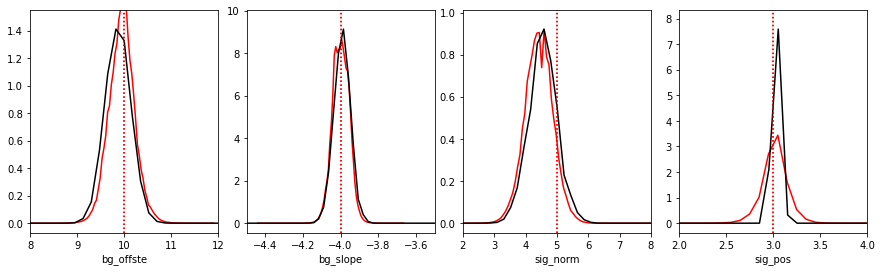

In [15]:
fig, diag = swyft.plot_1d(samples, [0, 1, 2, 3], bins = 100, figsize=(15,4), truth = v0, color='r', contours = False)
swyft.plot_1d(samples_MN, [0, 1, 2, 3], bins = 100, figsize=(15,4), truth = v0, fig = fig, contours = False)
fig.get_axes()[0].set_xlim([8, 12])
fig.get_axes()[1].set_xlim([-4.5, -3.5])
fig.get_axes()[2].set_xlim([2., 8])
fig.get_axes()[3].set_xlim([2.0, 4.])

### 2-dim posteriors

In [16]:
bound = task.history[-1][1]
store = task.store
store.add(10000, prior, bound = bound)
dataset = swyft.Dataset(10000, prior, store, simhook = noise, bound = bound)
task.store.simulate()

Store: Adding 8884 new samples to simulator store.


In [17]:
post = swyft.Posteriors(dataset)
post.add([[0, 1], [1, 2]], device='cuda')
post.train([[0, 1], [1, 2]])

Training: lr=0.001, Epoch=17, VL=0.7364


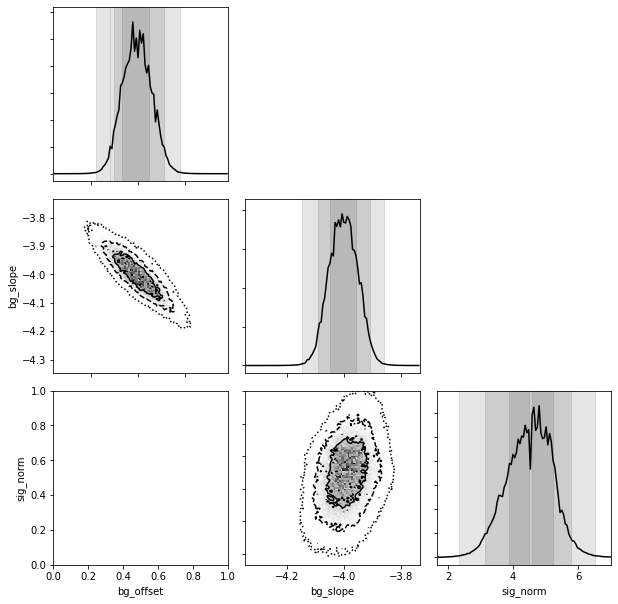

In [18]:
samples = post.sample(100000, obs0)
swyft.plot_corner(samples, [0, 1, 2]);

### Empirical vs nominal mass

In [19]:
masses = post.empirical_mass(nobs = 1000)

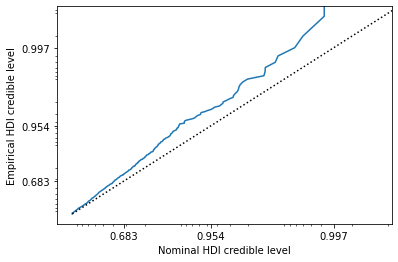

In [20]:
swyft.plot_empirical_mass(masses[(1, 2)])

## Frequentist upper limits

In [21]:
# Prior is defined in terms of a transform function

def transform2(u):
    return u*np.array([20, 10, 100, 0.0001]) + np.array([0, -5, 0, 5])
prior = swyft.Prior(transform2, 4)

In [22]:
%%time
task = ZoomTask(sim, prior, obs0, simhook = noise, partition = [0, 1])
task.run(rounds = 3, N = 3000, train_args = dict(batch_size = 128, max_epochs = 100))

Creating new store.
Store: Adding 2985 new samples to simulator store.
Training: lr=0.001, Epoch=35, VL=0.7959
Bounds: Truncating...
Bounds: ...done. New volue is V=0.05873
Store: Adding 2835 new samples to simulator store.
Training: lr=0.001, Epoch=29, VL=0.9128
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01278
Store: Adding 2400 new samples to simulator store.
Training: lr=0.001, Epoch=13, VL=1.376
Bounds: Truncating...
Bounds: ...done. New volue is V=0.01016
CPU times: user 28.3 s, sys: 11.9 s, total: 40.2 s
Wall time: 1min 12s


In [23]:
post = task.history[-1][0]
bound = task.history[-1][1]

In [24]:
post2 = swyft.Posteriors(post.dataset)
post2.add([2])
post2.train([2])

Training: lr=0.001, Epoch=28, VL=0.1922


In [93]:
TS = []
g = 3.
grid = np.linspace(0, 30, 100)
for _ in range(1000):
    v = prior.v(bound.sample(1))
    v[0, 2] = g
    obs = noise(model(v[0]), v[0])
    v = np.repeat(v, 101, axis = 0)
    v[:len(grid),2] = grid
    v[-1, 2] = g
    t = post2.eval(v, obs)['weights'][(2,)]
    tmax = t.max()
    t /= tmax
    t = -2*np.log(t)
    TS.append(t[-1])
TS = np.array(TS)

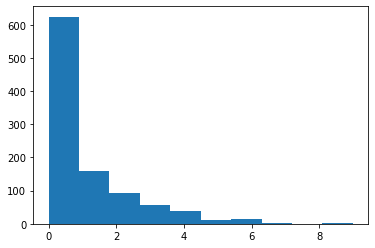

In [94]:
plt.hist(TS, bins = 10);

In [95]:
np.quantile(TS, [0.05, 0.95])

array([-0.       ,  3.8696094])